# Application the equivalent layer technique for estimating the magnetization direction: Montes Claros complex of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_calculation.ipynb'

In [4]:
#### Plot style

In [5]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [6]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [7]:
import auxiliary_functions as fc

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_mclaros = dict()

### Saving files

In [10]:
saved_files = []

### airborne survey information

In [11]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Properties of the model

### Main field

In [12]:
inc_gf,dec_gf = data['main_field']

In [13]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [14]:
h = 840.

#### Generating a layer

In [15]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [16]:
i_pos = 1500

In [17]:
it_max = 30

In [18]:
it_marq = 15

In [19]:
lamb = 10.
dlamb = 100.

In [20]:
eps_e = 1e-4
eps_i = 1e-4

In [21]:
mu_list = [1e2,1e3,1e4,1e5,2.5*1e5,5*1e5,7.5*1e5,1e6]

In [22]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_40'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-70.,50.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_40'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-68.72747945629843 47.456707195616126
0.0045946163580444285
i = 1
-67.5067356005965 45.42127635593315
0.004080378008321255
i = 2
-66.35481741244567 43.743589815659455
0.003633424974571558
i = 3
-65.27051137620623 42.3405797690948
0.0032458816221927972
i = 4
-64.24956073905074 41.15964779008897
0.0029028220033995894
i = 5
-63.28989381944459 40.16007452142352
0.0025910821851025828
i = 6
-62.3917336374643 39.31245091924309
0.0022943320275353963
i = 7
-61.55302617813704 38.59419298736034
0.0020194941630948863
i = 8
-60.77356815427379 37.98521989646027
0.00176127184259228
i = 9
-60.040410252587094 37.462094227493935
0.0015722205082340426
i = 10
-59.351246954124036 37.01374378220498
0.0013999067392091408
i = 11
-58.70312757825061 36.62990675662092
0.0012466436786612008
i = 12
-58.09392208329869 36.30227686746952
0.0011082049539100204
i = 13
-57.52021327075089 36.02302597046909
0.0009883858980205833
i = 14
-56.97961569038094 35.785343328458055
0.0008825667055766625
i = 15
-56.4686703256

-49.27036851689792 35.37573057988096
0.00010150463708673778
i = 41
-49.10683268560397 35.43059945417061
0.0
i = 0
-68.76085594716734 47.42093774562424
0.004010183951144655
i = 1
-67.56629011110759 45.36737527624842
0.003539544439007106
i = 2
-66.4321120183898 43.687328277688835
0.003145451884224396
i = 3
-65.36595437853501 42.28694577550549
0.0027910097102796963
i = 4
-64.36434278531799 41.11105600810373
0.0024779698588198056
i = 5
-63.42580333998896 40.117516202345286
0.002193778902667936
i = 6
-62.54864616996037 39.27478698658851
0.0019337400523224595
i = 7
-61.73126801463293 38.560550063980614
0.0016924860402020656
i = 8
-60.96256382905194 37.94791803278792
0.001508790588485482
i = 9
-60.23878179142552 37.42195644970083
0.0013470564063790154
i = 10
-59.558393722782334 36.97110885115253
0.0011982302272439452
i = 11
-58.91854141878482 36.58518618977979
0.0010658596413784303
i = 12
-58.31651960309798 36.25523381731436
0.000948661204840637
i = 13
-57.74963572963114 35.97337759849429
0.0

-68.5983049440037 34.110872425826386
0.00015664070195258958
i = 10
-68.50868242202354 33.246906622958754
0.00013008434930930618
i = 11
-68.42580567666931 32.46184945366373
0.00010852912385758924
i = 12
-68.3481893939715 31.711902266785643
0.0


## L-curve visualization

<Figure size 648x648 with 0 Axes>

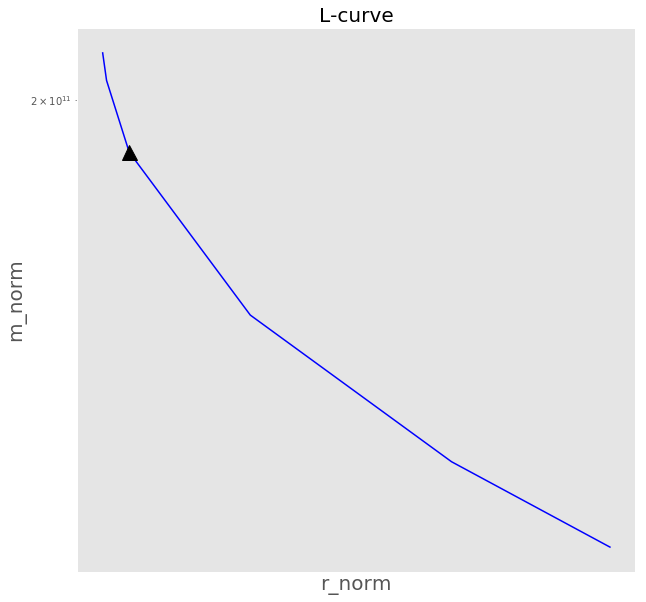

In [23]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r[4],norm_m[4], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [24]:
result_mclaros['magnetic_moment'] = m_est
result_mclaros['inc_est'] = incl_est
result_mclaros['dec_est'] = decl_est
result_mclaros['layer_depth'] = h
result_mclaros['reg_parameter'] = mu_list
result_mclaros['phi'] = phi_list

### Generating .pickle file

In [25]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_mclaros['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [26]:
file_name = 'data/result_mclaros.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_mclaros, f)
    
saved_files.append(file_name)

### Saved files

In [27]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_mclaros.pickle
